### 2000 U.S. Presidential Election in Florida

The 2000 presidential election was contested by George W. Bush (R) and Al Gore (D). It was an extraordinarily close race and came down to just one state: Florida. Because of the Electoral College, whoever won Florida would win the election.

In this Colab, you will explore the Florida election data by county to understand the controversies surrounding this election.

In [2]:
import pandas as pd
#https://colab.research.google.com/drive/1z0hCqfi9bOqmcRr5t-tEL1SraQTI0HVU?usp=sharing#scrollTo=vGWFfwY84IKD
# This overrides how Colab displays Pandas Series.
#from google.colab import _reprs
#_reprs.disable_pandas_series_repr

# Question 1
The data can be found at https://datasci112.stanford.edu/data/florida2000.csv. Read in the data. The columns Bush00, Gore00, Buchanan00, and Other00 contain the number of votes obtained by Bush, Gore, Pat Buchanan (a third-party candidate), and all other candidates, respectively, in the 2000 election.

Who won the election and by how many votes? Notice that some of the votes came from overseas absentee voters. If we exclude these votes, who would have won the election?

In [3]:
df=pd.read_csv("https://datasci112.stanford.edu/data/florida2000.csv")
df


County VotingMachine    Ballot  Undervote  Overvote  Bush00  \
0              Alachua       Optical  1-column      217.0     105.0   34124   
1                Baker       Optical  1-column       79.0      46.0    5610   
2                  Bay       Optical  1-column      541.0     141.0   38637   
3             Bradford       Optical  2-column       41.0     695.0    5414   
4              Brevard       Optical  1-column      277.0     136.0  115185   
..                 ...           ...       ...        ...       ...     ...   
63             Volusia       Optical  1-column      339.0     171.0   82357   
64             Wakulla      Datavote  1-column       49.0     373.0    4512   
65              Walton       Optical  1-column      135.0      72.0   12182   
66          Washington       Optical  1-column      305.0      36.0    4994   
67  (Federal Absentee)           NaN       NaN        NaN       NaN    1575   

    Gore00  Buchanan00  Other00  Clinton96  Dole96  Perot96  
0    47365         263     3971      40144   25303     8072  
1     2392          73       79       2273    3684      667  
2    18850         248     1065      17020   28290     5922  
3     3075          65      119       3356    4038      819  
4    97318         570     5311      80416   87980    25249  
..     ...         ...      ...        ...     ...      ...  
63   97304         498     3486      78905   63067    17319  
64    3838          46      189       3054    2931     1091  
65    5642         120      371       5341    7706     2342  
66    2798          88      145       2992    3522     1287  
67     836           5      636        902    1212       94  

[68 rows x 12 columns]

In [4]:
totalvotes=df[["Bush00","Gore00","Buchanan00","Other00","Clinton96","Dole96","Perot96"]].sum()
winner = totalvotes.idxmax()
print(totalvotes)
print("winner is:",winner)
print("")

#now lets see without absentee votes who is gonna win.
df_no_absentee=df[df["County"]!="(Federal Absentee)"]
totalwithoutabsentee=df_no_absentee[["Bush00","Gore00","Buchanan00","Other00","Clinton96","Dole96","Perot96"]].sum()
winner2 = totalwithoutabsentee.idxmax()
print(totalwithoutabsentee)
print("winner without absentee votes is:",winner2)



Bush00        2912790
Gore00        2912253
Buchanan00      17484
Other00        120583
Clinton96     2546870
Dole96        2244536
Perot96        483870
dtype: int64
winner is: Bush00

Bush00        2911215
Gore00        2911417
Buchanan00      17479
Other00        119947
Clinton96     2545968
Dole96        2243324
Perot96        483776
dtype: int64
winner without absentee votes is: Gore00


YOUR INTERPRETATION HERE

When we calculate the total votes for each candidate then we saw on the table Bush is the winner,but when we exclude the absentee votes Gore getting a winner.this exercise shows us a importance of absentee votes.

## Question 2
One controversy in the 2000 election was the so-called "butterfly ballot" used by Palm Beach County, shown below.
Gore was the 2nd ticket listed on the left-hand side, but to vote for Gore, a voter had to punch the 3rd hole. Punching the 2nd ticket would result in a vote for Pat Buchanan.

Many voters claimed that they were confused by the ballot design and inadvertently voted for Buchanan, when they meant to vote for Gore.

Learn: Take a look at the plotly scatter() documentation ( https://plotly.com/python-api-reference/generated/plotly.express.scatter.html). There are a ton of optional arguments! Pick 2 arguments besides DataFrame, x, and y and explain what they do.

Do: Make scatterplots of the data to see if there is evidence that there were an unusual number of voters for Pat Buchanan in Palm Beach County. Would this have been enough to swing the election?

In [5]:
# YOUR CODE HERE
import plotly.express as px
px.scatter(data_frame=df,x="Gore00",y="Buchanan00",color="County",hover_name="County",title="Buchanan vs Gore Votes by County (Florida 2000 Election)")
#as we see palm beach county point is upper compare than other counties,that means there is evidence that there were an unusual number of voters for Pat Buchanan in Palm Beach County

## Question 3a
Another controversy in the 2000 election was overvotes. Overvoting is when a voter selects more than one candidate. Overvotes are disqualified and not counted. In the 2000 election, Gore appeared on a disproportionate number of overvotes in Florida.

Calculate the overvote proportion in each county.

In [6]:
# total vote number for each county
df["total_votes"] = df["Bush00"] + df["Gore00"] + df["Buchanan00"] + df["Other00"]

# overvote proportion each county
df["overvote_proportion"] = df["Overvote"] / df["total_votes"]


df[["County", "Overvote", "total_votes", "overvote_proportion"]]





County  Overvote  total_votes  overvote_proportion
0              Alachua     105.0        85723             0.001225
1                Baker      46.0         8154             0.005641
2                  Bay     141.0        58800             0.002398
3             Bradford     695.0         8673             0.080134
4              Brevard     136.0       218384             0.000623
..                 ...       ...          ...                  ...
63             Volusia     171.0       183645             0.000931
64             Wakulla     373.0         8585             0.043448
65              Walton      72.0        18315             0.003931
66          Washington      36.0         8025             0.004486
67  (Federal Absentee)       NaN         3052                  NaN

[68 rows x 4 columns]

Question 3b
In the 2000 election, every county in Florida decided on a different voting machine and ballot design.

Use the grammar of graphics to determine if there is evidence that the voting machine (VotingMachine) or ballot design (Ballot) influenced the overvote ratio defined above.

In [7]:
graph1 = px.scatter(df, x="VotingMachine", y="overvote_proportion",
              title="Overvote Ratio by Voting Machine",
              color="VotingMachine")
graph1.show()

graph2 = px.scatter(df, x="Ballot", y="overvote_proportion",
              title="Overvote Ratio by Ballot Type",
              color="Ballot")
graph2.show()


YOUR INTERPRETATION HERE

The visualization shows that the overvote rate is much higher on average for punch card machines.
This suggests that the type of machine used can influence the error rate.
Furthermore, the rate is significantly higher in districts using butterfly ballots, suggesting that the design is confusing voters.

Question 4
Al Gore challenged the state-certified count in court, in a case that made it all the way to the Supreme Court (Bush v. Gore). Since miscast votes and overvotes cannot be counted, Gore's challenge focused on undervotes. Undervoting is when a voter selects no candidate. However, this may be because the voter did not fully punch a hole in the ballot, leaving so-called "hanging chads" (see image).
[hanging_chad.jpg](attachment:04f47417-73df-4d13-9e90-641667d38d35.jpg)
Gore demanded recounts in counties with punch-card ballots (i.e., Votomatic or Datavote), arguing that the undervote rate was higher in counties with punch-card ballots. Do you agree?!

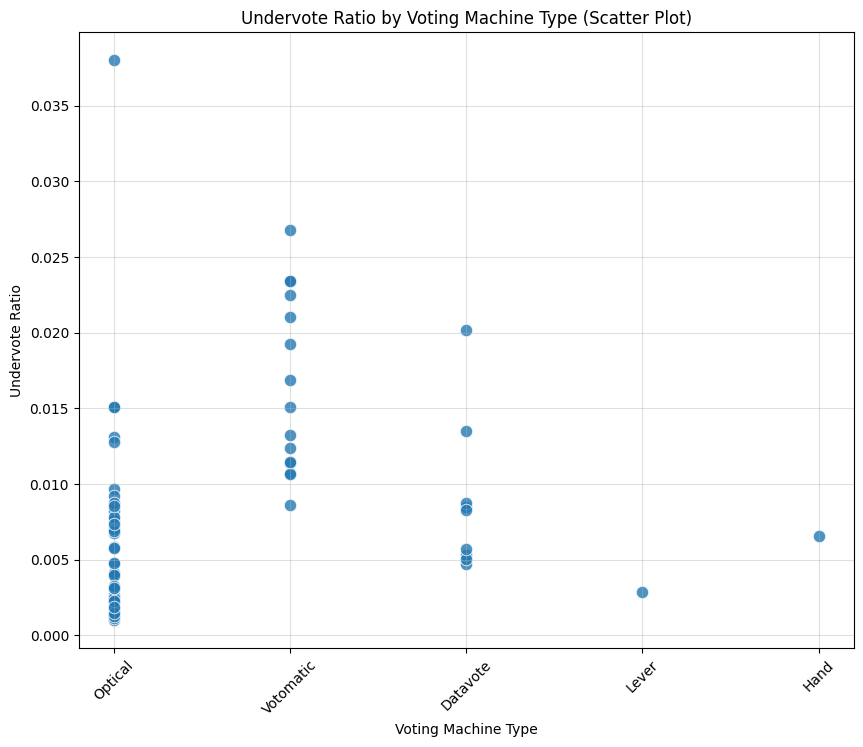

In [8]:
df["undervote_ratio"] = df["Undervote"] / (
    df["Bush00"] + df["Gore00"] + df["Buchanan00"] + df["Other00"]
)
punch_df = df[df["VotingMachine"].isin(["Votomatic", "Datavote"])]
non_punch_df = df[~df["VotingMachine"].isin(["Votomatic", "Datavote"])]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(x="VotingMachine", y="undervote_ratio", data=df, s=80, alpha=0.8)

plt.title("Undervote Ratio by Voting Machine Type (Scatter Plot)")
plt.xlabel("Voting Machine Type")
plt.ylabel("Undervote Ratio")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.show()


YOUR INTERPRETATION HERE
###I agree Gore's claim.

An examination of the box plot reveals that undervote rates are significantly higher on Votomatic and Datavote machines compared to other machine types.

This may be due to the high number of incompletely punched ballots, known as "hanging chads," in punch-card systems.

Therefore, Gore's claim appears to be plausible based on the data: there is evidence that votes are more likely to be invalidated in areas using punch-cards.